In [74]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In [75]:
np = pd.read_excel('Non-paying.xlsx')


C:\Users\Student1\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [76]:
whale = pd.read_excel('Whale.xlsx')

### Non-payng player

In [77]:
np.shape

(8457, 33)

In [78]:
np = np.drop_duplicates()

In [79]:
np.info() # кол-во логов уменьшилось с 8457 до 8408

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8408 entries, 0 to 8456
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8408 non-null   datetime64[ns]
 1   Day               8408 non-null   int64         
 2   Session           8408 non-null   int64         
 3   Video #           8408 non-null   float64       
 4   Videolink         8408 non-null   object        
 5   Videolength       8408 non-null   object        
 6   Timestamp         8408 non-null   object        
 7   Timelink          8408 non-null   object        
 8   Player Level      8405 non-null   float64       
 9   Stronghold Level  8408 non-null   int64         
 10  Tag               8408 non-null   object        
 11  Action            8408 non-null   object        
 12  Info              2463 non-null   object        
 13  Shortage1         311 non-null    object        
 14  Shortage2         30 non

In [80]:
np.describe() # визуально выбросов нет, однако столбец "Provimce" написан с явной ошибкой.
              # кроме того, столбец gems уже показывает изменение самоцветов (+100 или -3), так что колонки gems+/gems- не нужны

,Day,Session,Video #,Player Level,Stronghold Level,Team Power,Rarity,Provimce,Stage,Gems,Gems+,Gems-,Gems Balance
count,8408.000000,8408.000000,8408.000000,8405.000000,8408.000000,556.000000,345.000000,451.000000,450.000000,129.000000,8408.000000,8408.000000,8408.000000
mean,7.354662,20.053283,20.063642,9.243189,5.072788,1220.852518,1.324638,6.208426,4.157778,0.612403,0.070052,-0.060657,144.953378
std,4.309270,12.843562,12.833411,3.449143,1.685285,180.388090,0.516137,2.837999,2.433891,33.331739,1.364809,3.879429,91.074731
min,1.000000,1.000000,1.100000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-350.000000,0.000000,-350.000000,0.000000
25%,3.000000,8.000000,8.000000,7.000000,4.000000,1110.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,79.000000
50%,7.000000,20.000000,20.000000,10.000000,5.000000,1231.000000,1.000000,5.000000,4.000000,3.000000,0.000000,0.000000,125.000000
75%,11.000000,32.000000,32.000000,12.000000,6.000000,1340.000000,2.000000,9.000000,6.000000,5.000000,0.000000,0.000000,204.000000
max,14.000000,41.000000,41.000000,14.000000,8.000000,1523.000000,3.000000,12.000000,10.000000,100.000000,100.000000,0.000000,350.000000


In [81]:
np = np.rename(columns={'Provimce': 'Province'}).drop(columns=['Gems+', 'Gems-'])

<AxesSubplot:xlabel='Day'>

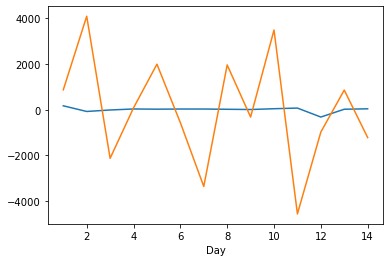

In [129]:
np.groupby(['Day'])['Gems'].sum().plot()
whale.groupby(['Day'])['Gems'].sum().plot()
# Видим, что размах затрат самоцветов гораздо больше у платящего игрока. 
# Предположительно у Кита будет больше контента, выше уровень, дольше длина сессий.
# Дни приобретения самоцветов и дни их трат чередуются - признак хорошей работы внутриигрового магазина. 

In [138]:
print(whale['Gems Balance'].tail(1)) 
np['Gems Balance'].tail(1)
# спустя 2 недели видим, что внутриигровая валюта даже и кита не скапливается - признак хорошего магазина!

10379    208
Name: Gems Balance, dtype: int64


8456    79
Name: Gems Balance, dtype: int64

In [119]:
from datetime import datetime, timedelta

In [120]:
vid = pd.read_excel('video.xlsx')
vid = vid.iloc[:, 2:]  
vid.head()

,Time,Day,Session
0,01:02:17,1.0,1.0
1,00:12:32,1.0,1.0
2,01:35:09,1.0,2.0
3,00:49:36,2.0,3.0
4,01:17:17,2.0,4.0


In [121]:
vid['Time'] = pd.to_datetime(vid['Time'], format='%H:%M:%S')
vid['Time'] = vid['Time'] - vid['Time'].dt.normalize() 

In [ ]:
# наверняка есть более адекватный алгоритм действий при переводе str во время для подсчёта интервала

<AxesSubplot:xlabel='Day'>

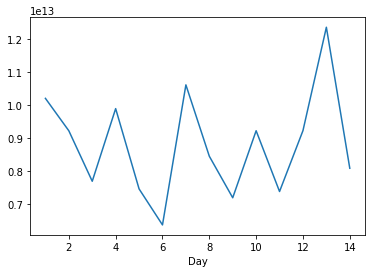

In [128]:
vid.groupby(['Day']).Time.sum().plot() # в чём измеряется?